In [1]:
# Install the required libraries
!pip install prophet

In [2]:
# Import the required libraries and dependencies
import pandas as pd
from prophet import Prophet
import datetime as dt
import numpy as np
%matplotlib inline

In [3]:
# Store the data in a Pandas DataFrame
# Set the "Date" column as the Datetime Index.

df_mercado_trends = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/google_hourly_search_trends.csv",
    index_col='Date',
    parse_dates=True
).dropna()

# Review the first and last five rows of the DataFrame
display(df_mercado_trends.head())
display(df_mercado_trends.tail())

<ipython-input-3-217fb1a948ac>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_mercado_trends = pd.read_csv(


,Search Trends
Date,
2016-06-01 00:00:00,97
2016-06-01 01:00:00,92
2016-06-01 02:00:00,76
2016-06-01 03:00:00,60
2016-06-01 04:00:00,38


,Search Trends
Date,
2020-09-07 20:00:00,71
2020-09-07 21:00:00,83
2020-09-07 22:00:00,96
2020-09-07 23:00:00,97
2020-09-08 00:00:00,96


In [4]:
# Review the data types of the DataFrame using the info function
df_mercado_trends.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37106 entries, 2016-06-01 00:00:00 to 2020-09-08 00:00:00
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Search Trends  37106 non-null  int64
dtypes: int64(1)
memory usage: 579.8 KB


<Axes: xlabel='Date'>

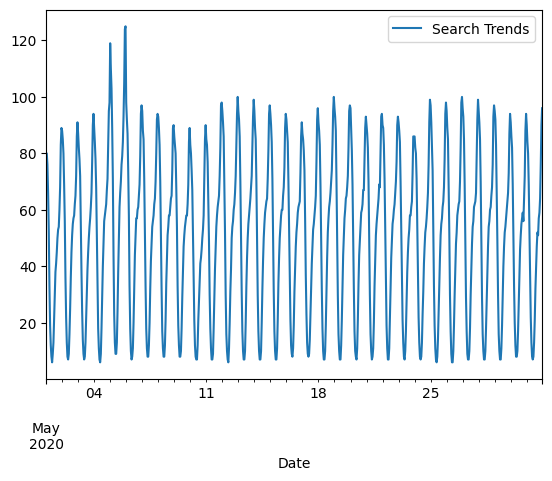

In [5]:
# Slice the DataFrame to just the month of May 2020
may_mercado_trends_df= df_mercado_trends.loc['2020-05']
may_mercado_trends_df.head()
may_mercado_trends_df.tail()
# Plot to visualize the data for May 2020
may_mercado_trends_df.plot()

In [6]:
# Calculate the sum of the total search traffic for May 2020
may_Search_Trends = may_mercado_trends_df.sum()

# View the traffic_may_2020 value
may_Search_Trends

Search Trends    38181
dtype: int64

In [7]:
# Calcluate the monhtly median search traffic across all months
# Group the DataFrame by index year and then index month, chain the sum and then the median functions
year = df_mercado_trends.index.year
month= df_mercado_trends.index.month
overall_median_monthly = df_mercado_trends.groupby([year,month]).sum().median()
# View the median_monthly_traffic value
overall_median_monthly

Search Trends    35172.5
dtype: float64

In [8]:
# Compare the seach traffic for the month of May 2020 to the overall monthly median value
may_Search_Trends/overall_median_monthly

Search Trends    1.085536
dtype: float64

##### Answer the following question:
**Question:** Did the Google search traffic increase during the month that MercadoLibre released its financial results?

**Answer:**: Yes google serach traffic shows an increse in the onth of May, when MercadoLibre released its results. This is evidenced by the ratio of May 2020 search trends to the overall monthly median for 2020 being >1 ( 1.08). the increase was ~8% higher.

## Step 2: Mine the Search Traffic Data for Seasonality
Marketing realizes that they can use the hourly search data, too. If they can track and predict interest in the company and its platform for any time of day, they can focus their marketing efforts around the times that have the most traffic. This will get a greater return on investment (ROI) from their marketing budget.

To that end, you want to mine the search traffic data for predictable seasonal patterns of interest in the company. To do so, complete the following steps:

1. Group the hourly search data to plot the average traffic by the hour of day. Does the search traffic peak at a particular time of day or is it relatively consistent?

2. Group the hourly search data to plot the average traffic by the day of the week (for example, Monday vs. Friday). Does the search traffic get busiest on any particular day of the week?

3. Group the hourly search data to plot the average traffic by the week of the year. Does the search traffic tend to increase during the winter holiday period (weeks 40 through 52)?


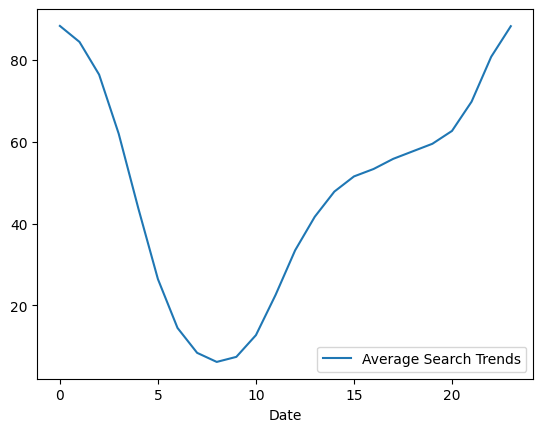

In [9]:
# Group the hourly search data to plot the average traffic by the day of week, using `df.index.hour`
hour= df_mercado_trends.index.hour
hourly_search_avg= df_mercado_trends['Search Trends'].groupby(hour).mean().plot().legend(['Average Search Trends'])
#hourly_search_avg

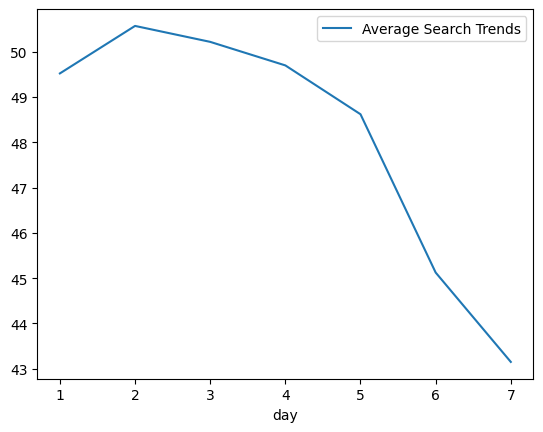

In [10]:
# Group the hourly search data to plot the average traffic by the day of week, using `df.index.isocalendar().day`.
dayofweek = df_mercado_trends.index.isocalendar().day
dow_avg_traffic= df_mercado_trends['Search Trends'].groupby(dayofweek).mean().plot().legend(['Average Search Trends'])

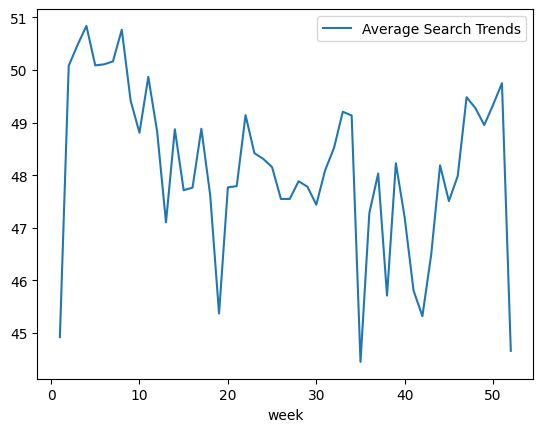

In [11]:
# Group the hourly search data to plot the average traffic by the week of the year using `df.index.isocalendar().week`.
weekofyear=df_mercado_trends.index.isocalendar().week
weekly_avg_traffic= df_mercado_trends['Search Trends'].groupby(weekofyear).mean().plot().legend(['Average Search Trends'])

Answer the following question:


*Question:** Are there any time based trends that you can see in the data?

**Answer:**: There are a few significant patterns in terms of the best time where there is most traffic observed for MercadoLibre:
1) On any given day, traffic peaks early in the monring (12:00 am - 2:00 am) and 8:00 pm - 12:00 am) this is typical of customers browzing outside of working hours that may likely contribute to the peaks
2) Search trends are n an increasing pattern starting Monday and peak on Tuesdays. Searches then continue on a declining pattern between Wednesday and Saturday. Weekdays see more traffic than weekends.
3) Traffic peaks during the first 3weeks of the year. A second uptick is also observed - building upwards from week 40 and having the highest traffci around week 50.

In [12]:
# Upload the "mercado_stock_price.csv" file into Colab, then store in a Pandas DataFrame
# Set the "date" column as the Datetime Index.
df_mercado_stock = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/mercado_stock_price.csv",
    index_col="date",
    parse_dates=True
).dropna()

# View the first and last five rows of the DataFrame
display(df_mercado_stock.head())
display(df_mercado_stock.tail())

,close
date,
2015-01-02 09:00:00,127.67
2015-01-02 10:00:00,125.44
2015-01-02 11:00:00,125.57
2015-01-02 12:00:00,125.40
2015-01-02 13:00:00,125.17


,close
date,
2020-07-31 11:00:00,1105.780
2020-07-31 12:00:00,1087.925
2020-07-31 13:00:00,1095.800
2020-07-31 14:00:00,1110.650
2020-07-31 15:00:00,1122.510


<Axes: xlabel='date'>

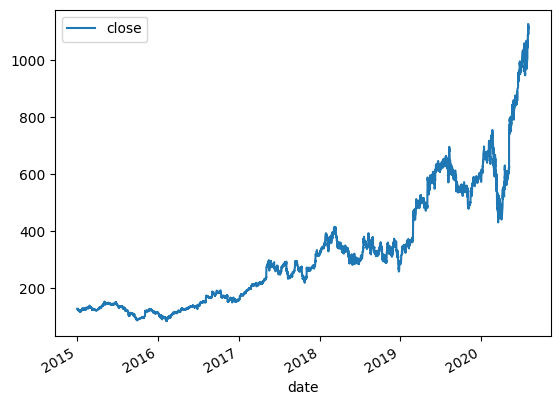

In [13]:
# Visualize the closing price of the df_mercado_stock DataFrame
df_mercado_stock.plot()

In [14]:
# Concatenate the df_mercado_stock DataFrame with the df_mercado_trends DataFrame
# Concatenate the DataFrame by columns (axis=1), and drop and rows with only one column of data
df_mercado_stock_trends =pd.concat([df_mercado_stock, df_mercado_trends], axis=1).dropna()

# View the first and last five rows of the DataFrame
display(df_mercado_stock_trends.head())
display(df_mercado_stock_trends.tail())
#

# View the first and last five rows of the DataFrame


,close,Search Trends
2016-06-01 09:00:00,135.16,6.0
2016-06-01 10:00:00,136.63,12.0
2016-06-01 11:00:00,136.56,22.0
2016-06-01 12:00:00,136.42,33.0
2016-06-01 13:00:00,136.10,40.0


,close,Search Trends
2020-07-31 11:00:00,1105.780,20.0
2020-07-31 12:00:00,1087.925,32.0
2020-07-31 13:00:00,1095.800,41.0
2020-07-31 14:00:00,1110.650,47.0
2020-07-31 15:00:00,1122.510,53.0


In [15]:
#For the combined dataframe, slice to just the first half of 2020 (2020-01 through 2020-06)
df_mercado_stock_trends_20201H = df_mercado_stock_trends.loc['2020-01':'2020-06']

# View the first and last five rows of first_half_2020 DataFrame
display(df_mercado_stock_trends_20201H.head(5))
display(df_mercado_stock_trends_20201H.tail(5))

,close,Search Trends
2020-01-02 09:00:00,601.085,9.0
2020-01-02 10:00:00,601.290,14.0
2020-01-02 11:00:00,615.410,25.0
2020-01-02 12:00:00,611.400,37.0
2020-01-02 13:00:00,611.830,50.0


,close,Search Trends
2020-06-30 11:00:00,976.17,17.0
2020-06-30 12:00:00,977.50,27.0
2020-06-30 13:00:00,973.23,37.0
2020-06-30 14:00:00,976.50,45.0
2020-06-30 15:00:00,984.93,51.0


array([<Axes: >, <Axes: >], dtype=object)

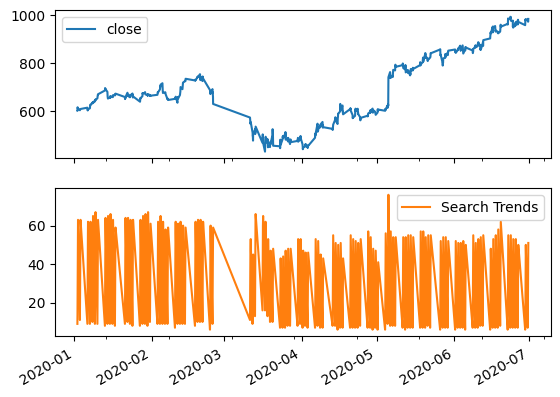

In [16]:
# Visualize the close and Search Trends data
# Plot each column on a separate axes using the following syntax
# `plot(subplots=True)
df_mercado_stock_trends_20201H.plot(subplots=True)

Answer the following question:

Question: Do both time series indicate a common trend that’s consistent with this narrative?

Answer:Based on the above 2 graphs there seems to be a significant uptick in the stock value of Mercadolibre, starting April 2020 and peaking through the end of June 2020. This is not the case with Web traffic during the same timeframe. Web traffic peaks went up to an avrage of >60 per day in the first 3 months of the year. There is an observed decrease in traffic starting April 2020  with peak traffic ranging around ~55 per day. While there is an uptick in traffic volume at the end of April 2020, we do see that the period between April and June does not pick back up to the peaks of ~60+ hits and hovers below 60. Based on these trends, web traffic does not seem to be the casue of the increase in stock value.

Step 3: Create a new column in the DataFrame named “Lagged Search Trends” that offsets, or shifts, the search traffic by one hour. Create two additional columns:
“Stock Volatility”, which holds an exponentially weighted four-hour rolling average of the company’s stock volatility

“Hourly Stock Return”, which holds the percent change of the company's stock price on an hourly basis

In [17]:
# Create a new column in the mercado_stock_trends_df DataFrame called Lagged Search Trends
# This column should shift the Search Trends information by one hour
df_mercado_stock_trends['Lagged Search Trends']= df_mercado_stock_trends['Search Trends'].shift(1)
df_mercado_stock_trends.head(5)

,close,Search Trends,Lagged Search Trends
2016-06-01 09:00:00,135.16,6.0,NaN
2016-06-01 10:00:00,136.63,12.0,6.0
2016-06-01 11:00:00,136.56,22.0,12.0
2016-06-01 12:00:00,136.42,33.0,22.0
2016-06-01 13:00:00,136.10,40.0,33.0


In [18]:
# Create a new column in the mercado_stock_trends_df DataFrame called Stock Volatility
# This column should calculate the standard deviation of the closing stock price return data over a 4 period rolling window
df_mercado_stock_trends['Stock Volatility']= df_mercado_stock_trends['close'].rolling(window=4).std()
df_mercado_stock_trends.head(5)

,close,Search Trends,Lagged Search Trends,Stock Volatility
2016-06-01 09:00:00,135.16,6.0,NaN,NaN
2016-06-01 10:00:00,136.63,12.0,6.0,NaN
2016-06-01 11:00:00,136.56,22.0,12.0,NaN
2016-06-01 12:00:00,136.42,33.0,22.0,0.693848
2016-06-01 13:00:00,136.10,40.0,33.0,0.235142


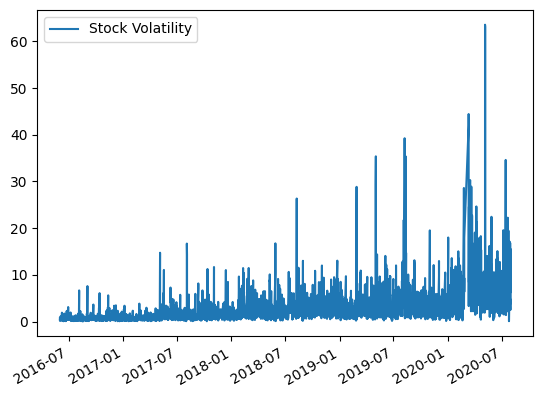

In [19]:
# Visualize the stock volatility
df_mercado_stock_trends['Stock Volatility'].plot().legend(['Stock Volatility'])

**Solution Note:** Note how volatility spiked, and tended to stay high, during the first half of 2020. This is a common characteristic of volatility in stock returns worldwide: high volatility days tend to be followed by yet more high volatility days. When it rains, it pours.

In [20]:
# Create a new column in the mercado_stock_trends_df DataFrame called Hourly Stock Return
# This column should calculate hourly return percentage of the closing price
df_mercado_stock_trends['Hourly Stock Return']= df_mercado_stock_trends['close'].pct_change()


In [21]:
# View the first and last five rows of the mercado_stock_trends_df DataFrame
display(df_mercado_stock_trends.head(5))
display(df_mercado_stock_trends.tail(5))

,close,Search Trends,Lagged Search Trends,Stock Volatility,Hourly Stock Return
2016-06-01 09:00:00,135.16,6.0,NaN,NaN,NaN
2016-06-01 10:00:00,136.63,12.0,6.0,NaN,0.010876
2016-06-01 11:00:00,136.56,22.0,12.0,NaN,-0.000512
2016-06-01 12:00:00,136.42,33.0,22.0,0.693848,-0.001025
2016-06-01 13:00:00,136.10,40.0,33.0,0.235142,-0.002346


,close,Search Trends,Lagged Search Trends,Stock Volatility,Hourly Stock Return
2020-07-31 11:00:00,1105.780,20.0,11.0,7.495900,0.006380
2020-07-31 12:00:00,1087.925,32.0,20.0,12.188462,-0.016147
2020-07-31 13:00:00,1095.800,41.0,32.0,7.393646,0.007239
2020-07-31 14:00:00,1110.650,47.0,41.0,10.169735,0.013552
2020-07-31 15:00:00,1122.510,53.0,47.0,15.408790,0.010678


Step 4: Review the time series correlation, and then answer the following question: Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?

In [22]:
# Construct correlation table of Stock Volatility, Lagged Search Trends, and Hourly Stock Return
df_mercado_stock_trends[['Stock Volatility', 'Lagged Search Trends', 'Hourly Stock Return']].corr()

,Stock Volatility,Lagged Search Trends,Hourly Stock Return
Stock Volatility,1.000000,-0.118945,0.046723
Lagged Search Trends,-0.118945,1.000000,0.017929
Hourly Stock Return,0.046723,0.017929,1.000000


Answer the following question:


Question: Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?


Answer: No, there is a very low negative correlation between lagged search trends and stock volatility. There is no evidence of a predictable relationship between lagged search trends and the hourly stock return as well , evidenced by the low positive correlation coefficient of 0.046.

Step 4: Create a Time Series Model with Prophet
Now, you need to produce a time series model that analyzes and forecasts patterns in the hourly search data. To do so, complete the following steps:

Set up the Google search data for a Prophet forecasting model.

After estimating the model, plot the forecast. How's the near-term forecast for the popularity of MercadoLibre?

Plot the individual time series components of the model to answer the following questions:

What time of day exhibits the greatest popularity?

Which day of the week gets the most search traffic?

What's the lowest point for search traffic in the calendar year?

In [43]:
# Using the df_mercado_trends DataFrame, reset the index so the date information is no longer the index

prophet_mercado_df= df_mercado_trends.reset_index()

# Label the columns ds and y so that the syntax is recognized by Prophet
prophet_mercado_df.columns = ['ds', 'y']

# Drop an NaN values from the prophet_df DataFrame
prophet_mercado_df.dropna()

# View the first and last five rows of the mercado_prophet_df DataFramw
display(prophet_mercado_df.head(5))
display(prophet_mercado_df.tail(5))

,ds,y
0,2016-06-01 00:00:00,97
1,2016-06-01 01:00:00,92
2,2016-06-01 02:00:00,76
3,2016-06-01 03:00:00,60
4,2016-06-01 04:00:00,38


,ds,y
37101,2020-09-07 20:00:00,71
37102,2020-09-07 21:00:00,83
37103,2020-09-07 22:00:00,96
37104,2020-09-07 23:00:00,97
37105,2020-09-08 00:00:00,96


In [39]:
# Call the Prophet function, store as an object
model1=Prophet()

In [40]:
# Fit the time-series model
model1.fit(prophet_mercado_df)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpe_t5cbwz/j569w73h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe_t5cbwz/20_cnf99.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13844', 'data', 'file=/tmp/tmpe_t5cbwz/j569w73h.json', 'init=/tmp/tmpe_t5cbwz/20_cnf99.json', 'output', 'file=/tmp/tmpe_t5cbwz/prophet_model5i9r89zr/prophet_model-20240806234625.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:46:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:46:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [42]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as 2000 hours (approx 80 days)
future_mercado_trend=model1.make_future_dataframe(periods=2000, freq='H')

# View the last five rows of the future_mercado_trends DataFrame
future_mercado_trend.tail(5)

,ds
39101,2020-11-30 04:00:00
39102,2020-11-30 05:00:00
39103,2020-11-30 06:00:00
39104,2020-11-30 07:00:00
39105,2020-11-30 08:00:00


In [44]:
# Make the predictions for the trend data using the future_mercado_trends DataFrame
future_mercado_trends_values=model1.predict(future_mercado_trend)

# Display the first five rows of the forecast_mercado_trends DataFrame
future_mercado_trends_values.head(5)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-06-01 00:00:00,44.469500,81.517237,97.652149,44.469500,44.469500,45.159722,45.159722,45.159722,41.452703,...,1.860594,1.860594,1.860594,1.846426,1.846426,1.846426,0.0,0.0,0.0,89.629222
1,2016-06-01 01:00:00,44.470406,76.961400,94.398693,44.470406,44.470406,41.605529,41.605529,41.605529,37.943556,...,1.810498,1.810498,1.810498,1.851474,1.851474,1.851474,0.0,0.0,0.0,86.075935
2,2016-06-01 02:00:00,44.471312,67.594411,83.744795,44.471312,44.471312,31.282049,31.282049,31.282049,27.656646,...,1.768912,1.768912,1.768912,1.856491,1.856491,1.856491,0.0,0.0,0.0,75.753361
3,2016-06-01 03:00:00,44.472218,52.027198,68.795977,44.472218,44.472218,16.014826,16.014826,16.014826,12.417424,...,1.735926,1.735926,1.735926,1.861476,1.861476,1.861476,0.0,0.0,0.0,60.487045
4,2016-06-01 04:00:00,44.473124,34.524582,52.291676,44.473124,44.473124,-1.100073,-1.100073,-1.100073,-4.677999,...,1.711496,1.711496,1.711496,1.866430,1.866430,1.866430,0.0,0.0,0.0,43.373051


#### Step 2: After estimating the model, plot the forecast. How's the near-term forecast for the popularity of MercadoLibre?

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


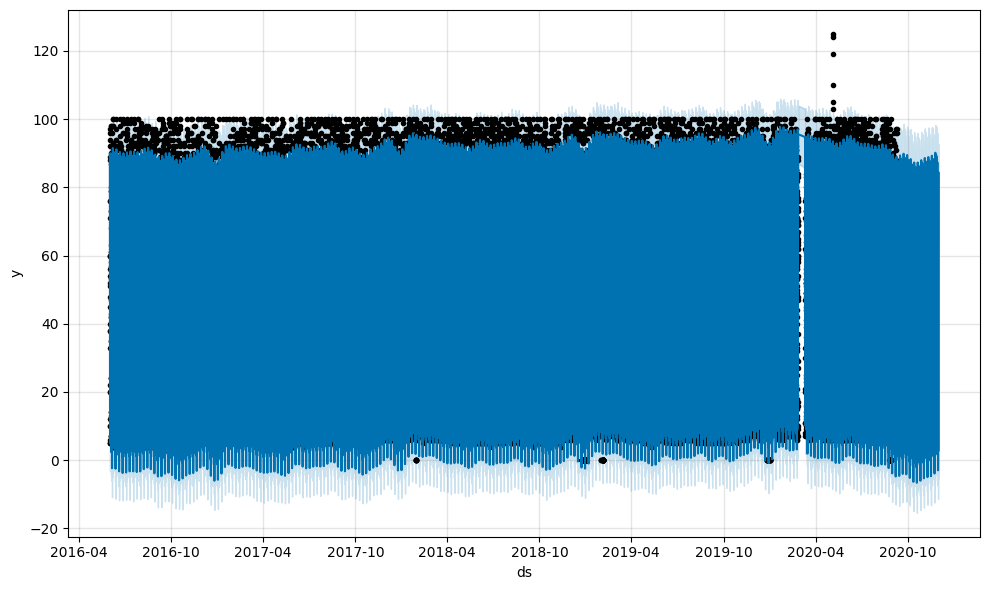

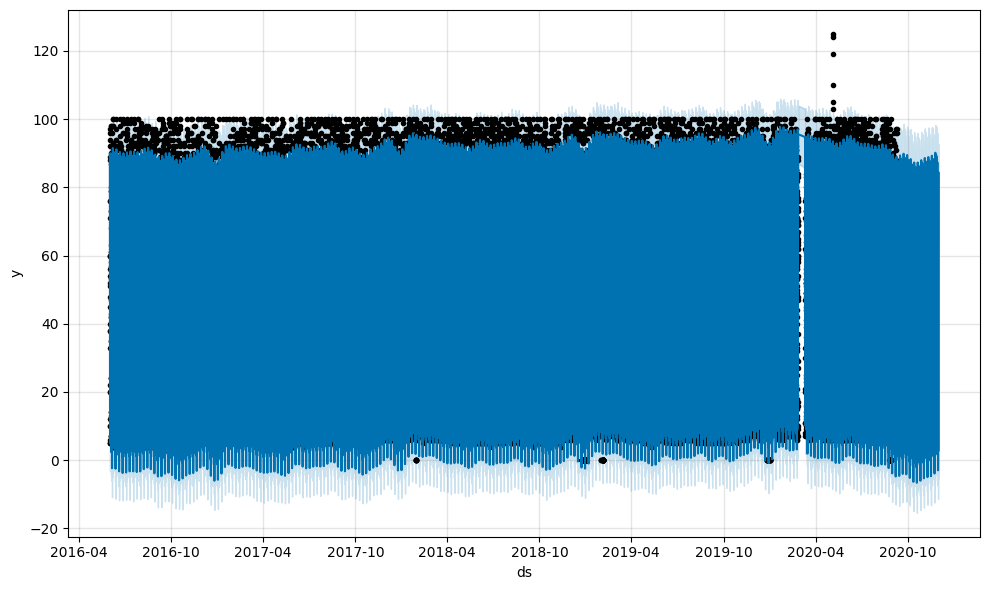

In [45]:
# Plot the Prophet predictions for the Mercado trends data
model1.plot(future_mercado_trends_values)

Answer the following question:


Question: How's the near-term forecast for the popularity of MercadoLibre?

Answer: The nearterm forcast shows a dip in web traffic trend post 2020-04. This is out of pattern with seasonality typycally observed during this time.The dip also seems to be lower than the dips seen in prior years. The forecast seems to be fairly accurate given the Yhat upper and yhat lower bounds are tight around the forecasted values.

In [47]:
# Set the index in the forecast_mercado_trends DataFrame to the ds datetime column

future_mercado_trends_values_new=future_mercado_trends_values.set_index('ds')

# View the only the yhat,yhat_lower and yhat_upper columns from the DataFrame
future_mercado_trends_values_new[['yhat','yhat_lower','yhat_upper']].head()

,yhat,yhat_lower,yhat_upper
ds,,,
2016-06-01 00:00:00,89.629222,81.517237,97.652149
2016-06-01 01:00:00,86.075935,76.961400,94.398693
2016-06-01 02:00:00,75.753361,67.594411,83.744795
2016-06-01 03:00:00,60.487045,52.027198,68.795977
2016-06-01 04:00:00,43.373051,34.524582,52.291676


<Axes: xlabel='ds'>

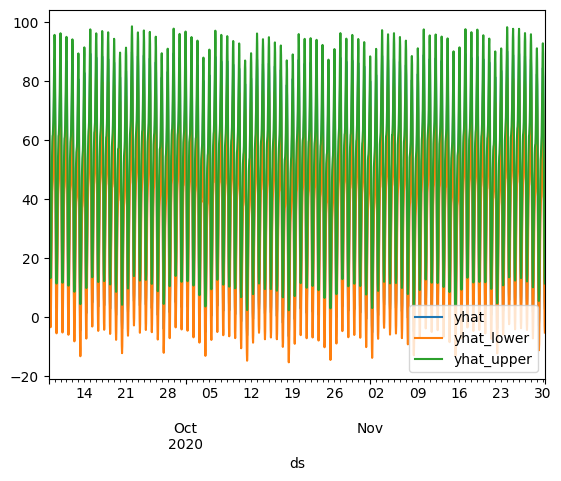

In [49]:
# From the forecast_mercado_trends DataFrame, plot the data to visualize
#  the yhat, yhat_lower, and yhat_upper columns over the last 2000 hours
future_mercado_trends_values_new[['yhat','yhat_lower','yhat_upper']].iloc[-2000:,:].plot()

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.ar

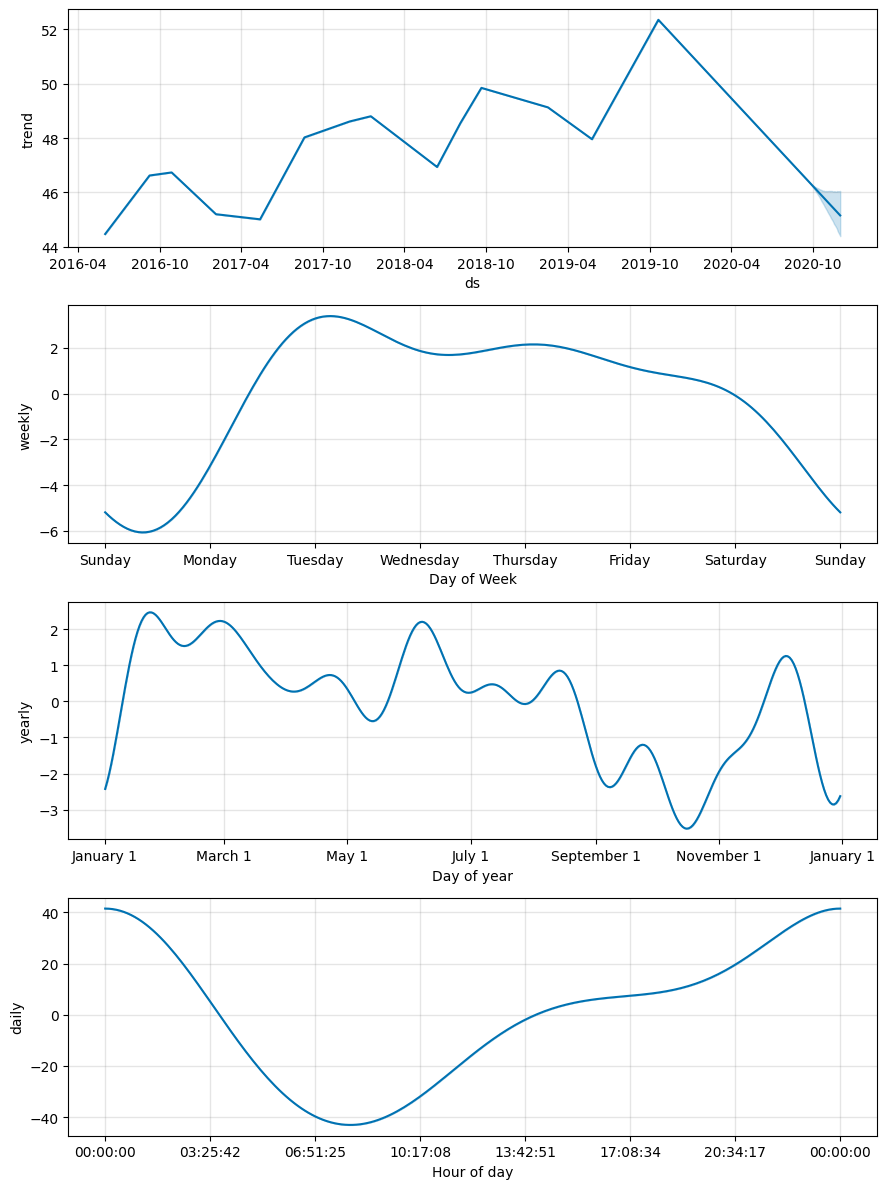

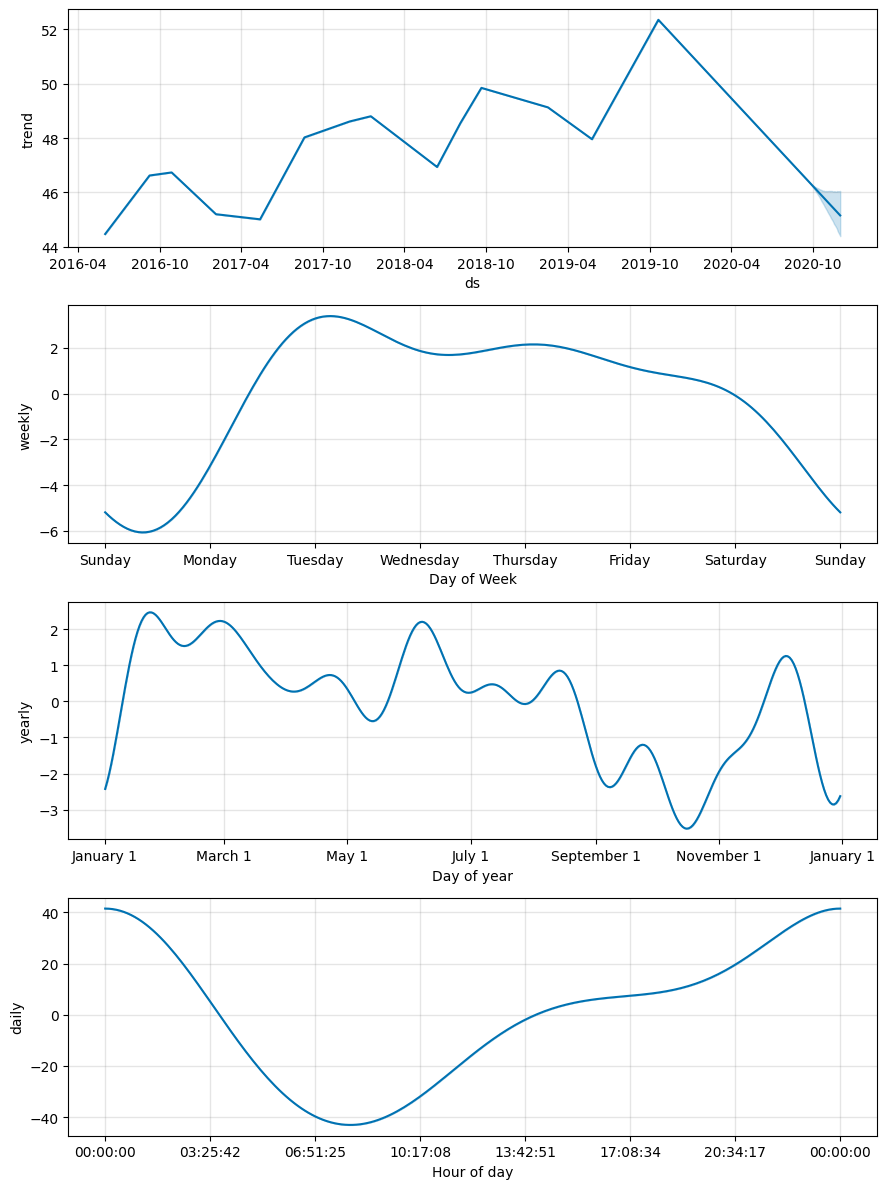

In [50]:
# Reset the index in the forecast_mercado_trends DataFrame

future_mercado_trends_values.reset_index()
# Use the plot_components function to visualize the forecast results
# for the forecast_canada DataFrame
model1.plot_components(future_mercado_trends_values)

##### Answer the following questions:

**Question:** What time of day exhibits the greatest popularity?

**Answer:** 12:00 am shows the maximum web traffic. Traffic steadily increases from 10:00 am and is the highest during the evening hours and peaks at the end of the day.

**Question:** Which day of week gets the most search traffic?
   
**Answer:** Tuesdays show the maximum amount of traffic. trend build up to Tuesday and then steadily drop as the weekend approaches.

Question: What's the lowest point for search traffic in the calendar year?

Answer: The lowest point of traffic in a calendar year occurs in mid October.